In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("train.csv")

In [5]:
test = pd.read_csv("test.csv")

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df = pd.concat([train, test])

In [11]:
df.shape

(2919, 81)

In [12]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
df.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
df = df.set_index('Id')

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [16]:
abc = df.isnull().sum()/df.shape[0]*100

In [17]:
abc

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [18]:
columns_drop = abc[abc > 20].keys()

In [19]:
columns_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], dtype='object')

In [20]:
df = df.drop(columns_drop, axis = 1)

In [21]:
df.shape

(2919, 74)

In [22]:
columns = list(df.columns.values)
for i in columns:
    print(i.ljust(25) + "\t" + str(len(df[i].unique())))

MSSubClass               	16
MSZoning                 	6
LotFrontage              	129
LotArea                  	1951
Street                   	2
LotShape                 	4
LandContour              	4
Utilities                	3
LotConfig                	5
LandSlope                	3
Neighborhood             	25
Condition1               	9
Condition2               	8
BldgType                 	5
HouseStyle               	8
OverallQual              	10
OverallCond              	9
YearBuilt                	118
YearRemodAdd             	61
RoofStyle                	6
RoofMatl                 	8
Exterior1st              	16
Exterior2nd              	17
MasVnrType               	5
MasVnrArea               	445
ExterQual                	4
ExterCond                	5
Foundation               	6
BsmtQual                 	5
BsmtCond                 	5
BsmtExposure             	5
BsmtFinType1             	7
BsmtFinSF1               	992
BsmtFinType2             	7
BsmtFinSF2               	273
B

In [23]:
col_headers = list(df.columns.values)
for i in col_headers:
    print(i)
    print(df[i].unique())
    print("\n")

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]


LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]


LotArea
[ 8450  9600 11250 ...  1894 20000 10441]


Street
['Pave' 'Grvl']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa' nan]


LotConfig
['In

#Outlier Detection

In [24]:
#Plot boxplots and remove values manually
#Decide upon a statistical figure -- remove rows outside 3 standard deviations from the mean

In [25]:
# MAD - Median absolute deviation
# We are going to make our dataset robust to outliers by transformation

##EDA

In [26]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
#skewness

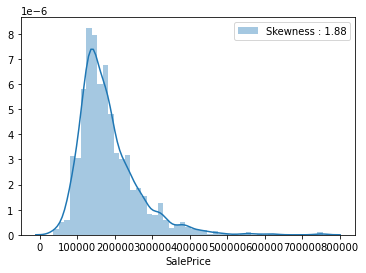

In [28]:
g = sns.distplot(train['SalePrice'])
g = g.legend(['Skewness : {:.2f}'.format(train['SalePrice'].skew())], loc='best')

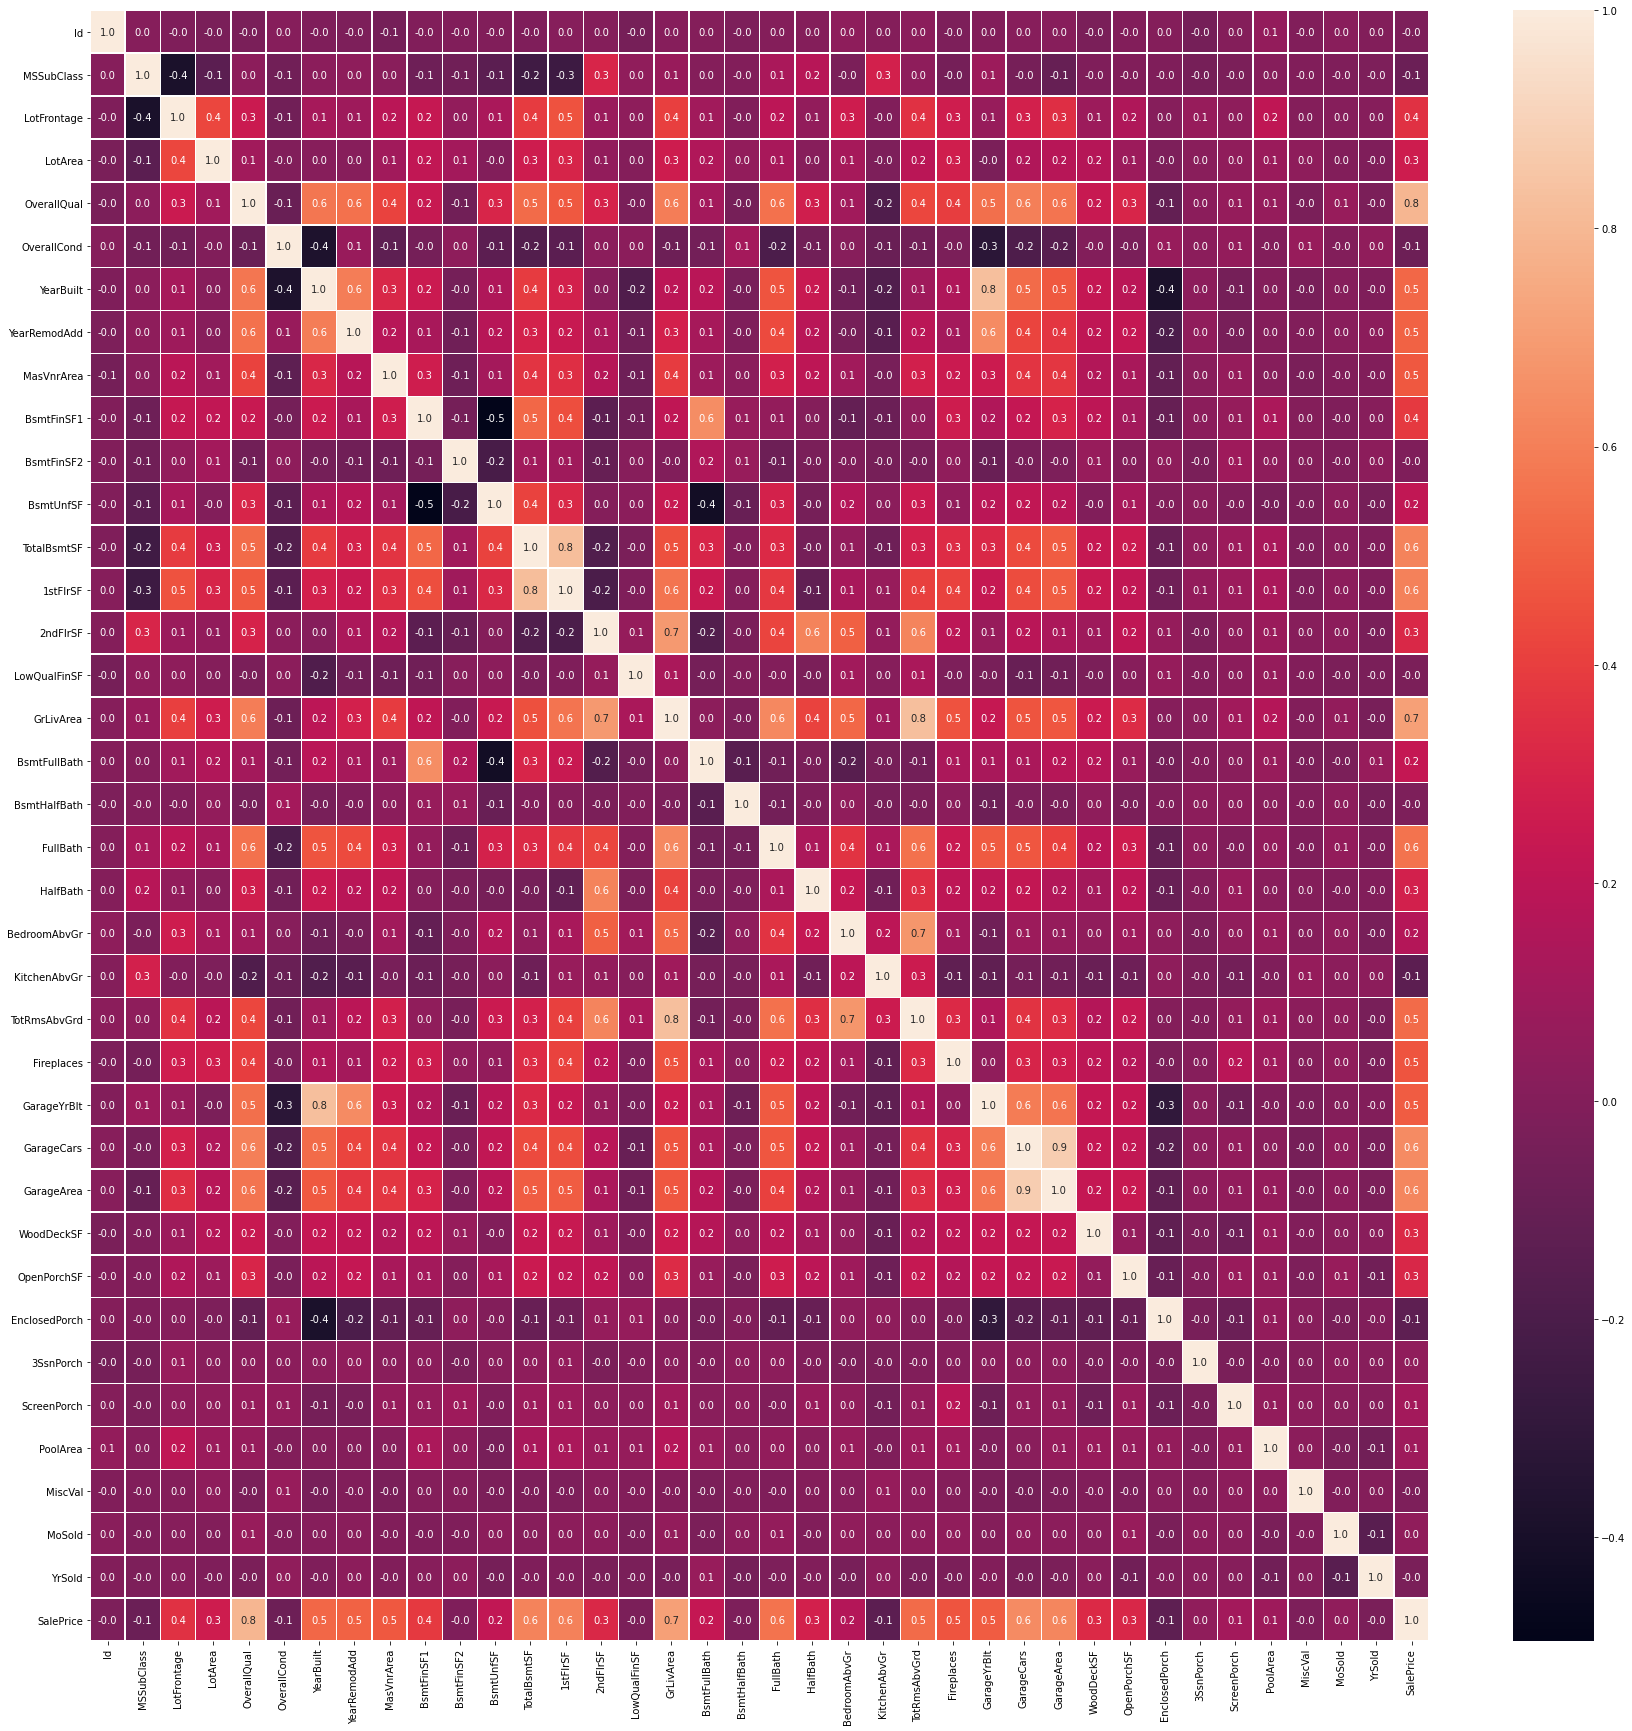

In [29]:
#Correlation
f,ax = plt.subplots(figsize = (30,30))
sns.heatmap(train.corr(), annot = True, linewidths = .5, fmt = ".1f", ax = ax)
plt.show()

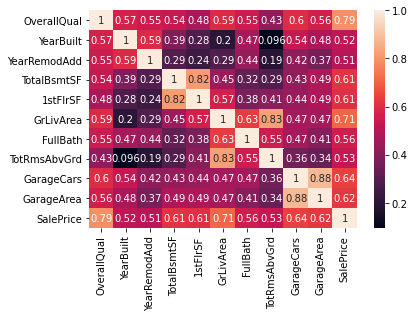

In [30]:
corre = train.corr()
top_corr_features = corre.index[abs(corre['SalePrice'])>0.5]
g = sns.heatmap(train[top_corr_features].corr(), annot = True)

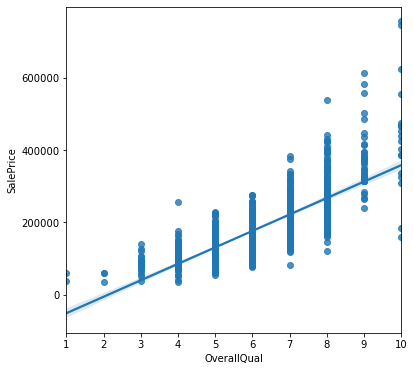

In [31]:
f,ax = plt.subplots(figsize = (6,6))
sns.regplot(data = train, x= "OverallQual", y = "SalePrice")

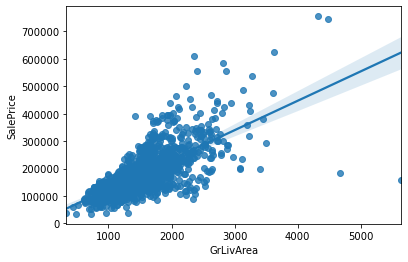

In [32]:
sns.regplot(data=train, x="GrLivArea", y="SalePrice")

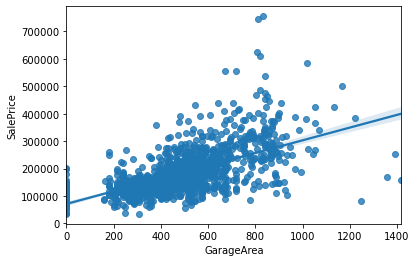

In [33]:
sns.regplot(data=train, x="GarageArea", y="SalePrice")

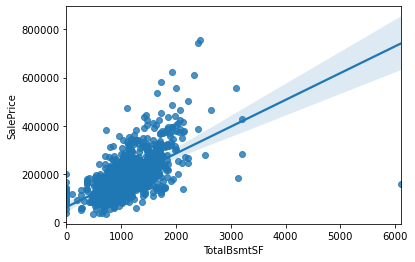

In [34]:
sns.regplot(data=train, x="TotalBsmtSF", y="SalePrice")

In [35]:
#Missing Value Imputation

In [36]:
missing_cols = df.columns[df.isnull().any()]

In [37]:
missing_cols

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [38]:
bsmt_cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
            'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']

In [39]:
bsmt_feat = df[bsmt_cols]

In [40]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      2837 non-null   object 
 1   BsmtExposure  2837 non-null   object 
 2   BsmtFinSF1    2918 non-null   float64
 3   BsmtFinSF2    2918 non-null   float64
 4   BsmtFinType1  2840 non-null   object 
 5   BsmtFinType2  2839 non-null   object 
 6   BsmtFullBath  2917 non-null   float64
 7   BsmtHalfBath  2917 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtUnfSF     2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [41]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]

In [42]:
bsmt_feat.shape

(88, 11)

In [43]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2805,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2825,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [44]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull()| bsmt_feat.isin([0])).all(1)]

In [45]:
bsmt_feat_all_nan.shape

(79, 11)

In [46]:
bsmt_feat_all_nan

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2805,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2825,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [47]:
qual = list(df.loc[:, df.dtypes == "object"].columns.values)

In [48]:
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [49]:
for i in bsmt_cols:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 'NA')
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 0)
bsmt_feat.update(bsmt_feat_all_nan)
df.update(bsmt_feat_all_nan)

In [50]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]

In [51]:
bsmt_feat.shape

(9, 11)

In [52]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
333,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,3206.0
949,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,936.0
1488,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
2041,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2186,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2218,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2219,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0
2349,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0
2525,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


In [53]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [54]:
pd.cut(range(0,1526),5)

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [55]:
df_slice = df[(df['BsmtFinSF2'] >= 305) & (df['BsmtFinSF2'] <= 610)]

In [56]:
bsmt_feat.at[333, 'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0]

In [57]:
bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtCond'].replace(np.nan, df[df['BsmtQual'] == 'Gd']['BsmtExposure'].mode()[0])

In [58]:
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtQual'].replace(np.nan, df['BsmtCond'].mode()[0])

In [59]:
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan, df['BsmtQual'].mode()[0])

In [60]:
df.update(bsmt_feat)

In [61]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [62]:
garage_cols = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']

In [63]:
gar_feat = df[garage_cols]

In [64]:
gar_feat = gar_feat[gar_feat.isnull().any(axis = 1)]

In [65]:
gar_feat.shape

(159, 7)

In [66]:
gar_feat_all_nan = gar_feat[(gar_feat.isnull()|gar_feat.isin([0])).all(1)]

In [67]:
gar_feat_all_nan.shape

(157, 7)

In [68]:
for i in garage_cols:
    if i in qual:
        gar_feat_all_nan[i] = gar_feat_all_nan[i].replace(np.nan, 'NA')
    else:
        gar_feat_all_nan[i] = gar_feat_all_nan[i].replace(np.nan,0)
gar_feat.update(gar_feat_all_nan)
df.update(gar_feat_all_nan)

In [69]:
gar_feat = gar_feat[gar_feat.isnull().any(axis=1)]

In [70]:
gar_feat

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
2127,360.0,1.0,NaN,NaN,NaN,Detchd,NaN
2577,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [71]:
for i in garage_cols:
    gar_feat[i] = gar_feat[i].replace(np.nan, df[df['GarageType'] == 'Detchd'][i].mode()[0])

In [72]:
df.update(gar_feat)

In [73]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'SaleType'],
      dtype='object')

In [74]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [75]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [76]:
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [77]:
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

In [78]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [79]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [80]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [81]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Utilities', 'MasVnrType', 'MasVnrArea'], dtype='object')

In [82]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [83]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [84]:
df[df['MasVnrArea'].isnull()==True]['MasVnrType'].unique()

array(['None'], dtype=object)

In [85]:
df.loc[(df["MasVnrType"] == "None") & (df['MasVnrArea'].isnull()==True), "MasVnrArea"]=0

In [86]:
df.isnull().sum()/df.shape[0]*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
Length: 74, dtype: float64

In [87]:
lotconfig = ['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
for i in lotconfig:
    df['LotFrontage'] = pd.np.where((df['LotFrontage'].isnull() == True) & (df['LotConfig'] == i), df[df['LotConfig'] == i]['LotFrontage'].mean(), df['LotFrontage'])

In [88]:
#Feature Transformation

In [89]:
convert_columns = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in convert_columns:
    df[i] = df[i].astype(str)

In [90]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_abbr[x])

In [91]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [92]:
quan = list(df.loc[:, df.dtypes!='object'].columns.values)

In [93]:
len(quan)

30

In [94]:
quan

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [95]:
#Ordered data
df['BsmtCond'] = pd.Categorical(df['BsmtCond'], categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [96]:
df['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int8)

In [97]:
df['BsmtExposure'] = pd.Categorical(df['BsmtExposure'], categories=['NA', 'Mn', 'Av', 'Gd'], ordered=True).codes

In [98]:
df['BsmtFinType1'] = pd.Categorical(df['BsmtFinType1'], categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True).codes

In [99]:
df['BsmtFinType2'] = pd.Categorical(df['BsmtFinType2'], categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True).codes

In [100]:
df['BsmtQual'] = pd.Categorical(df['BsmtQual'], categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [101]:
df['ExterQual'] = pd.Categorical(df['ExterQual'], categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [102]:
df['Functional'] = pd.Categorical(df['Functional'], categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [103]:
df['GarageQual'] = pd.Categorical(df['GarageQual'], categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [104]:
df['GarageFinish'] = pd.Categorical(df['GarageFinish'], categories=['NA', 'Unf', 'RFn', 'Fin'], ordered=True).codes

In [105]:
df['HeatingQC'] = pd.Categorical(df['HeatingQC'], categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [106]:
df['KitchenQual'] = pd.Categorical(df['KitchenQual'], categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True).codes

In [107]:
df['PavedDrive'] = pd.Categorical(df['PavedDrive'], categories=['N', 'P', 'Y'], ordered=True).codes

In [108]:
df['Utilities'] = pd.Categorical(df['Utilities'], categories=['ELO', 'NASeWa', 'NASewr', 'AllPub'], ordered=True).codes

In [109]:
skewed_features = ['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

LotFrontage


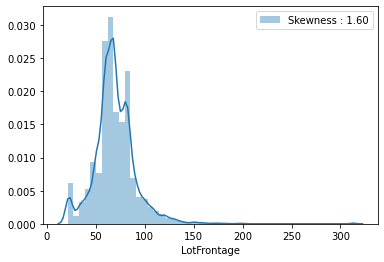

LotArea


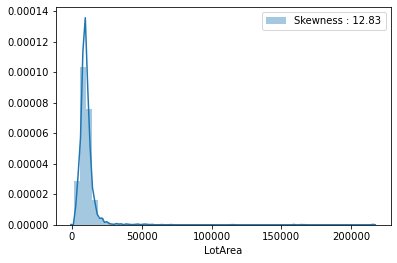

OverallQual


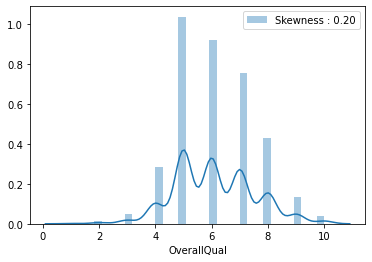

OverallCond


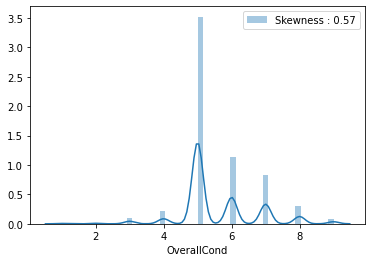

MasVnrArea


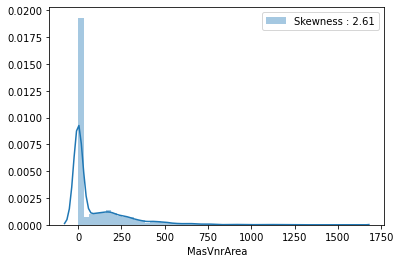

BsmtFinSF1


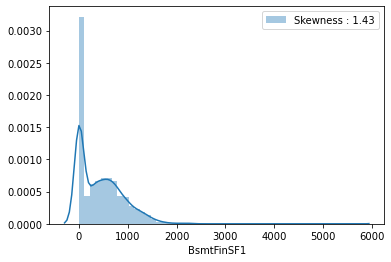

BsmtFinSF2


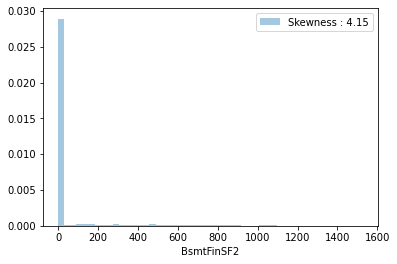

BsmtUnfSF


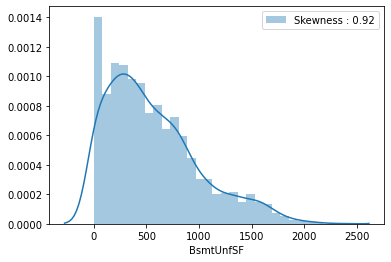

TotalBsmtSF


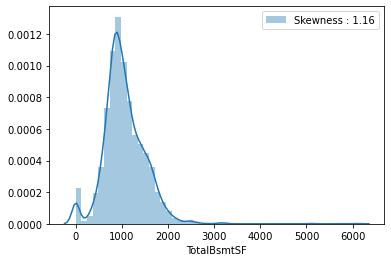

1stFlrSF


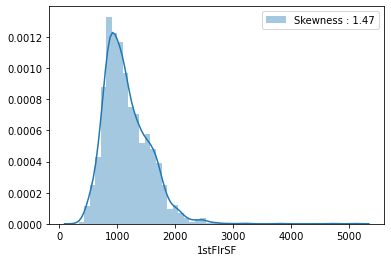

2ndFlrSF


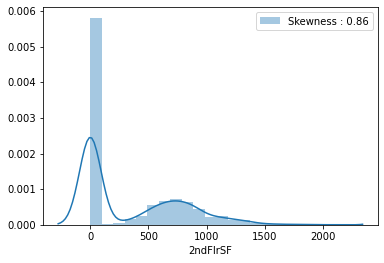

LowQualFinSF


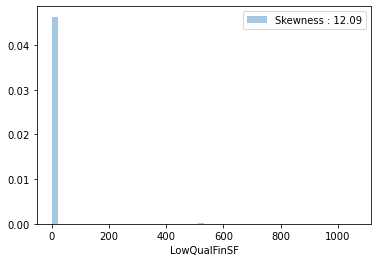

GrLivArea


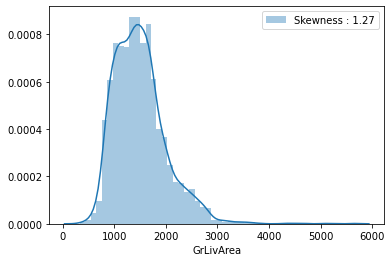

BsmtFullBath


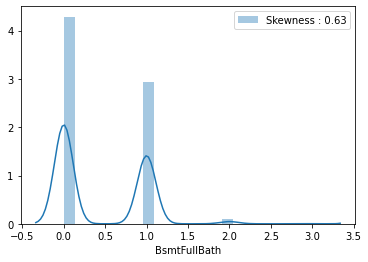

BsmtHalfBath


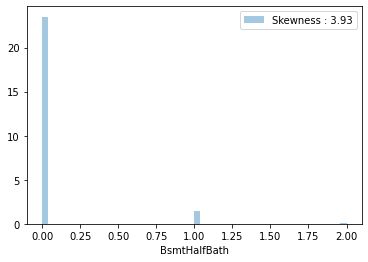

FullBath


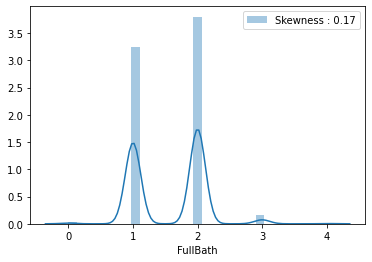

HalfBath


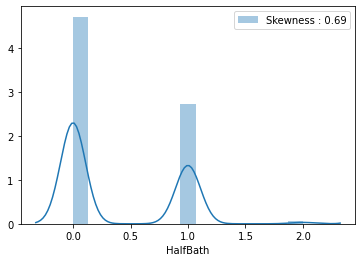

BedroomAbvGr


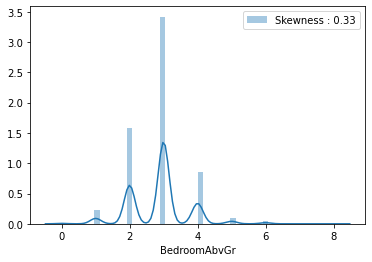

KitchenAbvGr


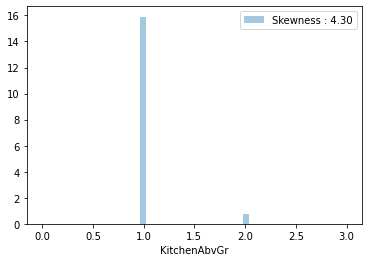

TotRmsAbvGrd


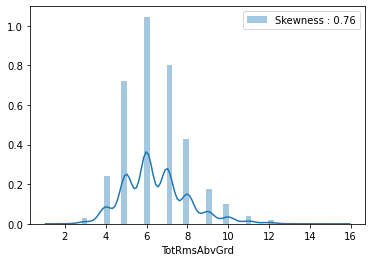

Fireplaces


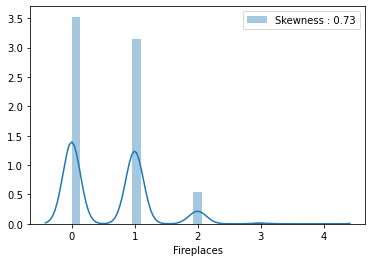

GarageCars


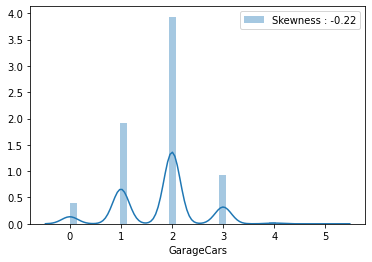

GarageArea


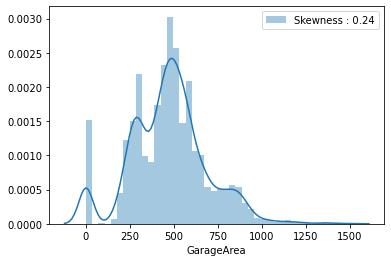

WoodDeckSF


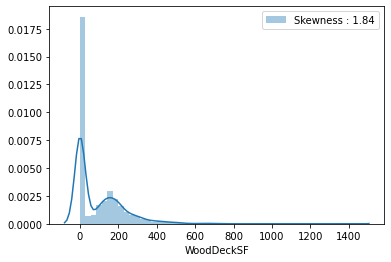

OpenPorchSF


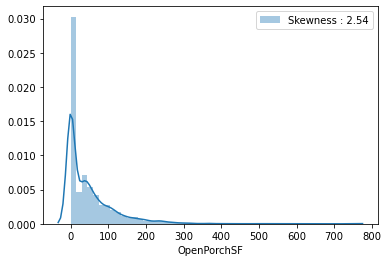

EnclosedPorch


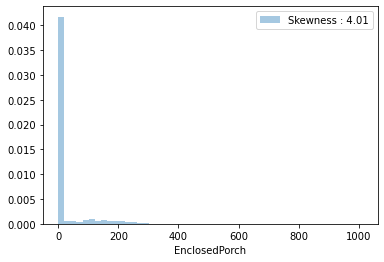

3SsnPorch


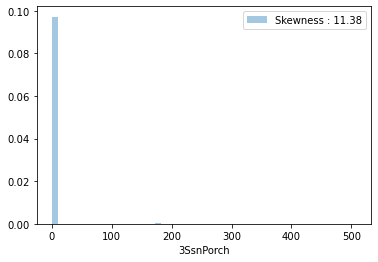

ScreenPorch


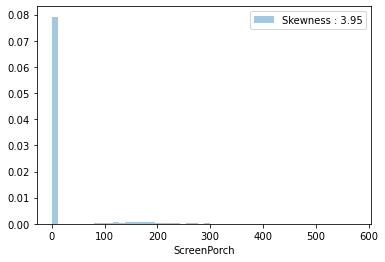

PoolArea


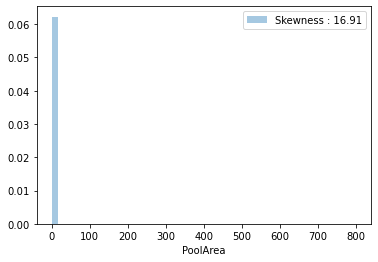

MiscVal


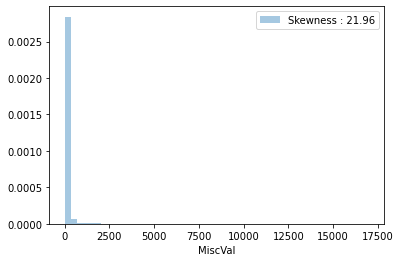

In [110]:
for i in skewed_features:
    print(i)
    g = sns.distplot(df[i])
    g = g.legend(['Skewness : {:.2f}'.format(df[i].skew())], loc='best')
    plt.show()

In [111]:
#Remove skewness from the data
for i in skewed_features:
    df[i] = np.log(df[i] + 1)

In [112]:
SalePrice = np.log(train['SalePrice'] + 1)

In [113]:
#Create Dummies for all non ordinal categorical data

In [114]:
qual = list(df.loc[:, df.dtypes == 'object'].columns.values)

In [115]:
len(qual)

31

In [116]:
dummy_drop = []
for i in qual:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]
    
df = pd.get_dummies(df, columns = qual)
df = df.drop(dummy_drop, axis = 1)

In [117]:
df.shape

(2919, 507)

In [118]:
from sklearn.preprocessing import RobustScaler

In [119]:
#Normalize

scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [120]:
#Modelling

In [121]:
#Split data to train and test

In [122]:
train_len = len(train)

In [123]:
X_train = df[:train_len]

In [124]:
X_test = df[train_len:]

In [125]:
X_train.shape

(1460, 507)

In [126]:
Y_train = SalePrice

In [133]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [137]:
def test_model(model):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, Y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [138]:
import sklearn.linear_model as linear_model

In [139]:
LR = linear_model.LinearRegression()
test_model(LR)

[-5.7293375222706715e+22]

In [140]:
Rid = linear_model.Ridge()
test_model(Rid)

[0.8580549883220668]

In [141]:
lasso = linear_model.Lasso(alpha = 1e-4)
test_model(lasso)

[0.8629721561797625]

In [142]:
# ensemble Modelling

In [143]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

In [144]:
GB = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1, loss = 'ls', random_state = 10)

In [145]:
test_model(GB)

[0.8768435427507192]

In [146]:
BR = BaggingRegressor(base_estimator = None, n_estimators = 1000, random_state = 10)

In [147]:
test_model(BR)

[0.8560192599186381]

In [148]:
GB.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=10)

In [149]:
Y_predict = np.expm1(GB.predict(X_test)).round(2)

In [150]:
Y_predict[0:5]

array([119231.08, 162372.85, 188831.03, 192744.37, 191665.14])